In [1]:
from pdb import set_trace

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
def load_data(float_dtype=False):
    
    iris = load_iris()
    X = iris.data  
    y = iris.target

    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    x_train = torch.tensor(x_train, dtype=torch.float32)
    x_valid = torch.tensor(x_valid, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_valid = torch.tensor(y_valid, dtype=torch.long)
    
    return x_train, y_train, x_valid, y_valid

# Optimization Algorithms in Deep Learning

In this notebook, we'll cover some of the most commonly used optimization algorithms in training deep learning models, including **SGD**, **Adam**, **RMSprop**, and others. We'll explore how each one works, implement them in PyTorch, and compare their behaviors.

## Overview of Optimization Algorithms
- **Stochastic Gradient Descent (SGD)**
- **Momentum**
- **Adagrad**
- **RMSprop**
- **Adam**

# Stochastic Gradient Descent (SGD)

SGD updates the parameters based on each individual training sample. It's one of the simplest optimization algorithms but can be enhanced with techniques like momentum.

## PyTorch Implementation


In [77]:
x, y, _, _ = load_data(True)

In [78]:
x.shape, y.shape

(torch.Size([120, 4]), torch.Size([120]))

In [79]:
model = nn.Sequential(nn.Linear(4, 1))
criterion = nn.MSELoss()
learning_rate = 0.01
epochs = 800

In [80]:
model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [81]:
def train_with_manul_SGD(x,y, squeeze=False):
    
    torch.manual_seed(0)
    
    for epoch in range(epochs):
        y_pred = model(x)
        y_pred = y_pred if squeeze is False else y_pred.squeeze()
        loss = criterion(y_pred, y)
        loss.backward()
        
        with torch.no_grad():
            
            for param in model.parameters():
                param -= learning_rate * param.grad
                
#             model.zero_grad()
            
        if epoch % 10 == 0:
            print(loss)
            

In [82]:
train_with_manul_SGD(x,y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([120])) that is different to the input size (torch.Size([120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: Found dtype Long but expected Float

In [83]:
train_with_manul_SGD(x,y, True)

RuntimeError: Found dtype Long but expected Float

In [84]:
t1 = torch.rand(3,1)
t2 = torch.rand(3)

In [85]:
t1.shape, t2.shape

(torch.Size([3, 1]), torch.Size([3]))

In [86]:
criterion(t1.squeeze(),t2)

tensor(0.2142)

In [87]:
def calc_mse(small_y_pred, small_y):
    res = []
    for i in range(len(small_y_pred)):
        res.append((small_y_pred[i] - small_y[i])**2)
    sum_ = sum(res)
    return sum_ / len(small_y_pred)

In [88]:
calc_mse(t1, t2)

tensor([0.2142])

In [89]:
criterion(t1, t2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1300)

In [90]:
t1.shape, t2.shape

(torch.Size([3, 1]), torch.Size([3]))

In [91]:
t1

tensor([[0.4963],
        [0.7682],
        [0.0885]])

In [92]:
t2

tensor([0.1320, 0.3074, 0.6341])

In [93]:
x=torch.rand(3,2,2,2)
y=torch.rand(  2,1,1)

In [94]:
x.shape

torch.Size([3, 2, 2, 2])

In [95]:
criterion(x,y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2, 1, 1])) that is different to the input size (torch.Size([3, 2, 2, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.2562)

In [96]:
y.expand_as(x)

tensor([[[[0.3051, 0.3051],
          [0.3051, 0.3051]],

         [[0.9320, 0.9320],
          [0.9320, 0.9320]]],


        [[[0.3051, 0.3051],
          [0.3051, 0.3051]],

         [[0.9320, 0.9320],
          [0.9320, 0.9320]]],


        [[[0.3051, 0.3051],
          [0.3051, 0.3051]],

         [[0.9320, 0.9320],
          [0.9320, 0.9320]]]])

In [97]:
x

tensor([[[[0.4901, 0.8964],
          [0.4556, 0.6323]],

         [[0.3489, 0.4017],
          [0.0223, 0.1689]]],


        [[[0.2939, 0.5185],
          [0.6977, 0.8000]],

         [[0.1610, 0.2823],
          [0.6816, 0.9152]]],


        [[[0.3971, 0.8742],
          [0.4194, 0.5529]],

         [[0.9527, 0.0362],
          [0.1852, 0.3734]]]])

In [98]:
x+y

tensor([[[[0.7952, 1.2015],
          [0.7607, 0.9374]],

         [[1.2809, 1.3337],
          [0.9543, 1.1009]]],


        [[[0.5990, 0.8236],
          [1.0028, 1.1051]],

         [[1.0930, 1.2143],
          [1.6136, 1.8472]]],


        [[[0.7022, 1.1793],
          [0.7245, 0.8580]],

         [[1.8847, 0.9682],
          [1.1172, 1.3054]]]])

In [99]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
x, y, _, _ = load_data(True)

In [100]:
def train_with_PyTorch_SGD(x,y):
    
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if epoch % 100 == 0:
            print(loss)

In [101]:
train_with_PyTorch_SGD(x,y)

RuntimeError: Found dtype Long but expected Float

In [102]:
y.shape

torch.Size([120])

In [103]:
y = y.reshape(y.shape[0], -1)
y.shape

torch.Size([120, 1])

In [104]:
train_with_PyTorch_SGD(x,y)

RuntimeError: Found dtype Long but expected Float

In [129]:
x, y, x_valid, y_valid = load_data(True)

In [130]:
y_valid.shape

torch.Size([30])

## Actually Working Neural Net

In [159]:
class IrisDataNeuralNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4,10)
        self.fc2 = nn.Linear(10,3)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
for i in rage(50):
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mdl.parameters(), lr=0.01)
    train(epochs, mdl, x_train, y_train, criterion, optimizer)

In [160]:
mdl = IrisDataNeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mdl.parameters(), lr=0.01)

In [133]:
epochs = 30

In [162]:
def train(epochs, mdl, x, y, criterion, optimizer):
    for epoch in range(epochs):
        prediction = mdl(x)
        loss = criterion(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#         if epoch % 100 == 0:
#             print(loss)
    avg_loss.append(loss.item())

In [135]:
x_train, y_train, x_valid, y_valid = load_data()

In [136]:
train(epochs, mdl, x_train, y_train, criterion, optimizer)

tensor(1.2435, grad_fn=<NllLossBackward0>)
tensor(1.0797, grad_fn=<NllLossBackward0>)
tensor(1.0030, grad_fn=<NllLossBackward0>)


Why is this not working? How do u suggest I debug this?

In [181]:
avg_loss = []
for i in range(50):
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mdl.parameters(), lr=0.01)
    train(epochs, mdl, x_train, y_train, criterion, optimizer)

In [182]:
avg_loss_with_SGD = sum(avg_loss) / len(avg_loss)

In [183]:
avg_loss_with_SGD

0.9302096748352051

In [70]:
def accuracy(x_valid, y_valid, mdl):
    preds = torch.argmax(mdl(x_valid), dim=1)
    accuracy = (preds == y_valid).float().mean().item()
    return accuracy

In [71]:
accuracy(x_valid, y_valid, mdl)

1.0

In [35]:
y_valid[:5]

tensor([1, 0, 2, 1, 1])

In [36]:
ds = x_valid[:5]
ds.shape

torch.Size([5, 4])

In [37]:
preds = mdl(ds)
preds.shape

torch.Size([5, 3])

In [38]:
preds.argmax(dim=1)

tensor([1, 0, 2, 1, 1])

# SGD with Momentum

Momentum helps accelerate SGD in the relevant direction and dampens oscillations.

Using momentum, the optimizer keeps track of the derivative calculated so far. The next time we will want to modify the weights, a big part of the change will be determined by the saved derivatives.

Optimizer works by keeping track of the derivative I had so far. The next time I want to change my weights, I'll take a big portion of the previous derivative and only a small portion of the current one

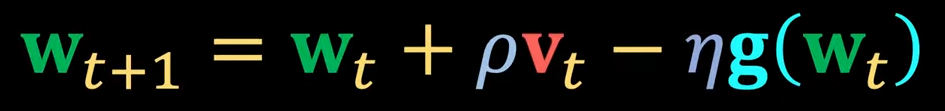

## Self Implementation

In [137]:
gradients = []

In [198]:
mdl = IrisDataNeuralNet()

In [187]:
def train_with_momentum(epochs, mdl, x, criterion, y, momentum, lr):
    
    velocity = {param: torch.zeros_like(param) for param in mdl.parameters()}
    
    for epoch in range(epochs):
        preds = mdl(x)
        loss = criterion(preds, y)
        mdl.zero_grad()
        loss.backward()
        
        with torch.no_grad():
            for param in mdl.parameters():
                if param.grad is not None:
                    gradients.append(param.grad.sum())
                    velocity[param] = momentum * velocity[param] - lr * param.grad
                    param += velocity[param]
                    
    acc = accuracy(x_valid, y_valid, mdl)
    return acc      

In [188]:
velocity = {param: torch.zeros_like(param) for param in mdl.parameters()}
velocity

{Parameter containing:
 tensor([[-0.0835, -0.2612,  0.4457,  0.2817],
         [-0.1185, -0.0292, -0.0746,  0.0384],
         [-0.0377, -0.0602, -0.2956,  0.0724],
         [-0.2810,  0.1186,  0.2420,  0.4677],
         [-0.3168,  0.0344, -0.0490, -0.0829],
         [ 0.3784, -0.0555, -0.3824, -0.1063],
         [ 0.3696,  0.3712, -0.5937, -0.5326],
         [ 0.1440, -0.0105,  0.3460, -0.4591],
         [-0.0807, -0.1979, -0.2127,  0.2820],
         [ 0.3398,  0.0446, -0.7274, -0.2301]], requires_grad=True): tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 Parameter containing:
 tensor([ 0.1844, -0.2918, -0.2270,  0.0637, -0.1749,  0.3185,  0.3807,  0.0364,
         -0.2754, -0.0485], requires_grad=True): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 Parameter 

In [189]:
for param in mdl.parameters():
    print(param)

Parameter containing:
tensor([[-0.0835, -0.2612,  0.4457,  0.2817],
        [-0.1185, -0.0292, -0.0746,  0.0384],
        [-0.0377, -0.0602, -0.2956,  0.0724],
        [-0.2810,  0.1186,  0.2420,  0.4677],
        [-0.3168,  0.0344, -0.0490, -0.0829],
        [ 0.3784, -0.0555, -0.3824, -0.1063],
        [ 0.3696,  0.3712, -0.5937, -0.5326],
        [ 0.1440, -0.0105,  0.3460, -0.4591],
        [-0.0807, -0.1979, -0.2127,  0.2820],
        [ 0.3398,  0.0446, -0.7274, -0.2301]], requires_grad=True)
Parameter containing:
tensor([ 0.1844, -0.2918, -0.2270,  0.0637, -0.1749,  0.3185,  0.3807,  0.0364,
        -0.2754, -0.0485], requires_grad=True)
Parameter containing:
tensor([[-0.2513,  0.0572,  0.2421, -0.0438, -0.0407,  0.3612,  0.4360, -0.1603,
          0.0719,  0.4679],
        [ 0.3447, -0.0030, -0.0553,  0.3177, -0.2089,  0.1284, -0.1351,  0.0792,
          0.1271, -0.1385],
        [ 0.4022, -0.0642,  0.0187,  0.3047, -0.0745, -0.1055, -0.7010, -0.0659,
         -0.0924, -0.3705]]

In [190]:
x_train, y_train, x_valid, y_valid = load_data()

mdl = IrisDataNeuralNet()
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(mdl.parameters(), lr=lr)
epochs = 30

In [195]:
avg_loss = []
for i in range(50):
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    loss = train_with_momentum(30, mdl, x_train, criterion, y, 0.9, lr)
    avg_loss.append(loss)

In [196]:
sum(avg_loss) / len(avg_loss)

0.48648258447647097

In [158]:
train_with_momentum(30, mdl, x_train, criterion, y, 0.9, lr)

0.8333333134651184

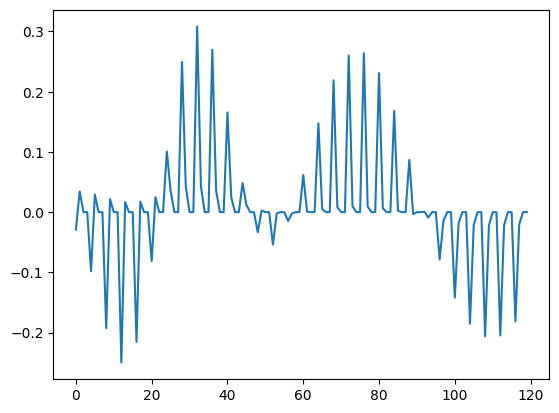

In [172]:
plt.plot(gradients)

In [173]:
len(gradients)

120

In [174]:
for i in range(10):
    x_train, y_train, x_valid, y_valid = load_data()
    mdl = IrisDataNeuralNet()
    acc = train_with_momentum(30, mdl, x_train, criterion, y, 0.9, lr)
    print(acc)

0.7333333492279053
0.8333333134651184
0.699999988079071
0.8333333134651184
0.8333333134651184
0.800000011920929
1.0
1.0
0.7333333492279053
0.7333333492279053


In [175]:
for i in range(10):
    x_train, y_train, x_valid, y_valid = load_data()
    mdl = IrisDataNeuralNet()
    acc = train_with_momentum(30, mdl, x_train, criterion, y, 0, lr)
    print(acc)

0.699999988079071
0.6666666865348816
0.7333333492279053
0.7333333492279053
0.699999988079071
0.699999988079071
0.36666667461395264
0.699999988079071
0.699999988079071
0.699999988079071


### How many parameters does the network use?

The calculation is as follows:
- fc layer - num_inputs * num_outputs + num_outputs (assuming bias=True which is the default)

In [176]:
model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [177]:
# sum(p.numel() for p in model.parameters() if p.requires_grad)

### How many gradients matrices are there?

In each layer, PyTorch stores all params in one matrix. A matrix for weights and a matrix for bias. If we have two layers, how many param tensors do we have?

In [206]:
mdl

IrisDataNeuralNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)

In [207]:
sum(1 for param in mdl.parameters() if param.grad is not None)

0

If this is the case, why is this the size of the gradients list?
Hint: look at the code that creates the gradients list

## PyTorch Implementation

In [226]:
def load_data_train_and_evaluate(momentum=0.9, epochs=30):
    
    x_train, y_train, x_valid, y_valid = load_data()
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mdl.parameters(), lr=0.01, momentum=momentum)
    
    for epoch in range(epochs):
        prediction = mdl(x_train)
        loss = criterion(prediction, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = accuracy(x_valid, y_valid, mdl)
    return acc

In [227]:
load_data_train_and_evaluate(momentum=0)

0.5333333611488342

In [228]:
load_data_train_and_evaluate(momentum=0.9)

1.0

In [229]:
def calc_avg_with_and_without_momentum(epochs=10):
    res_without_mom = []
    res_with_mom = []
    
    for i in range(epochs):
        res_without_mom.append(load_data_train_and_evaluate())
        res_with_mom.append(load_data_train_and_evaluate(with_momentum=True))        
        
    res_with_mom_avg = sum(res_with_mom) / len(res_with_mom)
    res_without_mom_avg = sum(res_without_mom) / len(res_with_mom)
    
    return {'with_mom': res_with_mom_avg, 'without_mom': res_without_mom_avg}

In [230]:
calc_avg_with_and_without_momentum()

TypeError: load_data_train_and_evaluate() got an unexpected keyword argument 'with_momentum'

# Adagrad

Adagrad adapts the learning rate for each parameter based on the history of squared gradients, making it suitable for sparse data.

## PyTorch Implementation


In [263]:
mdl = IrisDataNeuralNet()

In [264]:
x_train, y_train, x_valid, y_valid = load_data()

In [260]:
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [266]:
print(y_train.unique())


tensor([0, 1, 2])


In [267]:
model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [281]:
avg_loss = []
for i in range(50):
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adagrad(mdl.parameters(), lr=0.01)
    train(epochs, mdl, x_train, y_train, criterion, optimizer)

In [282]:
sum(avg_loss) / len(avg_loss)

0.8302608633041382

In [272]:
model

Sequential(
  (0): Linear(in_features=4, out_features=1, bias=True)
)

In [273]:
mdl

IrisDataNeuralNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)

In [274]:

optimizer.zero_grad()
output = mdl(x_train)
# from pdb import set_trace
# set_trace()
loss = criterion(output, y_train)
loss.backward()
optimizer.step()


print("Adagrad step completed. Loss:", loss.item())

Adagrad step completed. Loss: 0.937211275100708


In [268]:

optimizer.zero_grad()
output = mdl(x_train)
loss = criterion(output, y_train)
loss.backward()
optimizer.step()


print("Adagrad step completed. Loss:", loss.item())

Adagrad step completed. Loss: 1.2488263845443726


# RMSprop - Root Mean Square Propogation


RMSprop divides the learning rate by an exponentially decaying average of squared gradients. It is often used in RNNs and handles non-stationary objectives well.

## PyTorch Implementation


In [283]:
def load_data_train_and_evaluate(epochs=30):
    
    x_train, y_train, x_valid, y_valid = load_data()
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    
    for epoch in range(epochs):
        prediction = mdl(x_train)
        loss = criterion(prediction, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = accuracy(x_valid, y_valid, mdl)
    return acc

In [284]:
load_data_train_and_evaluate()

0.30000001192092896

In [293]:
avg_loss = []
for i in range(50):
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(mdl.parameters(), lr=0.01)
    train(epochs, mdl, x_train, y_train, criterion, optimizer)

In [294]:
sum(avg_loss) / len(avg_loss)

0.36562441289424896

# Adam

Adam combines the benefits of RMSprop and momentum by using adaptive learning rates and momentum.

## PyTorch Implementation


In [295]:
def load_data_train_and_evaluate(epochs=30):
    
    x_train, y_train, x_valid, y_valid = load_data()
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(epochs):
        prediction = mdl(x_train)
        loss = criterion(prediction, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = accuracy(x_valid, y_valid, mdl)
    return acc

In [305]:
avg_loss = []
for i in range(50):
    mdl = IrisDataNeuralNet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(mdl.parameters(), lr=0.01)
    train(epochs, mdl, x_train, y_train, criterion, optimizer)

In [306]:
sum(avg_loss) / len(avg_loss)

0.5031394863128662

In [296]:
for i in range(10):
    print(load_data_train_and_evaluate())

0.30000001192092896
0.36666667461395264
0.5333333611488342
0.30000001192092896
0.0
0.36666667461395264
0.4333333373069763
0.3333333432674408
0.36666667461395264
0.3333333432674408


In [307]:
batch_size = 64
learning_rate = 0.001
num_epochs = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) 
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [308]:
image, label = train_dataset[15]

In [309]:
image.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


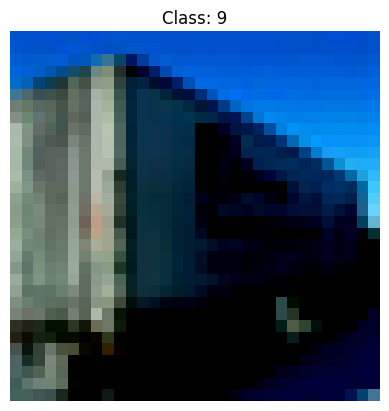

In [310]:
plt.imshow(image.permute(1, 2, 0)) # height, width, channels
plt.title(f"Class: {label}")
plt.axis("off")
plt.show()

In [311]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [312]:
def train(model, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

In [313]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [314]:
%time train(model, optimizer, 10)

Epoch [1/10], Loss: 1.4332
Epoch [2/10], Loss: 1.0690
Epoch [3/10], Loss: 0.9270
Epoch [4/10], Loss: 0.8282
Epoch [5/10], Loss: 0.7524
Epoch [6/10], Loss: 0.6830
Epoch [7/10], Loss: 0.6266
Epoch [8/10], Loss: 0.5675
Epoch [9/10], Loss: 0.5176
Epoch [10/10], Loss: 0.4786
CPU times: user 13min 43s, sys: 35min 52s, total: 49min 36s
Wall time: 6min 6s


In [ ]:
def test(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy on test set: {100 * correct / total:.2f}%")

train(model, optimizer, num_epochs)
test(model)

Epoch [1/10], Loss: 0.4396
Epoch [2/10], Loss: 0.4007


In [ ]:
batch_size = 64
learning_rate = 0.1
num_epochs = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizing CIFAR-10 images
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
def train(model, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

In [ ]:
%time train(model, optimizer, 20)